<a href="https://colab.research.google.com/github/outoflaksh/MNIST-CNN/blob/main/EL_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the req. libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


## DATA LOADING AND PRE PROCESSING
### Train:Test = 80:20

In [ ]:
digits_data = keras.datasets.mnist.load_data()

(X_train_og, y_train_og), (X_test_og, y_test_og) = digits_data

X_train = X_train_og.astype("float32")[:56000]/255
#X_test = np.concatenate(X_test_og.astype("float32"), X_train_og.astype("float32")[56000:])/255
X_test = X_test_og.astype("float32")/255

extra_train_data = X_train_og.astype("float32")[56000:]/255
X_test = np.concatenate((X_test, extra_train_data))

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

y_train = keras.utils.to_categorical(y_train_og[:56000], 10)
y_test = keras.utils.to_categorical(np.concatenate((y_test_og, y_train_og[56000:])), 10)


## DEFINING NEURAL NETWORK ARCHITECTURE

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print("Model Done!")

Model Done!


## TRAINING WITH 15 EPOCHS AND A VALIDATION SPLIT OF 20%

In [ ]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 128, validation_split = 0.2)

Epoch 1/15
394/394 [==============================] - 15s 36ms/step - loss: 1.4894 - accuracy: 0.4477 - val_loss: 0.1262 - val_accuracy: 0.9762
Epoch 2/15
394/394 [==============================] - 14s 36ms/step - loss: 0.4866 - accuracy: 0.8326 - val_loss: 0.0704 - val_accuracy: 0.9850
Epoch 3/15
394/394 [==============================] - 14s 35ms/step - loss: 0.3555 - accuracy: 0.8781 - val_loss: 0.0726 - val_accuracy: 0.9855
Epoch 4/15
394/394 [==============================] - 14s 35ms/step - loss: 0.3025 - accuracy: 0.8975 - val_loss: 0.0552 - val_accuracy: 0.9884
Epoch 5/15
394/394 [==============================] - 14s 35ms/step - loss: 0.2659 - accuracy: 0.9088 - val_loss: 0.0696 - val_accuracy: 0.9845
Epoch 6/15
394/394 [==============================] - 14s 35ms/step - loss: 0.2439 - accuracy: 0.9135 - val_loss: 0.0429 - val_accuracy: 0.9907
Epoch 7/15
394/394 [==============================] - 14s 35ms/step - loss: 0.2317 - accuracy: 0.9169 - val_loss: 0.0521 - val_accuracy:

## SAVING THE MODEL FOR USE IN THE ACTUAL PROG

In [ ]:
model.save("model1.h5")

## CALCULATING THE ACCURACY SO OBTAINED

In [ ]:
#m1 = keras.models.load_model("model1.h5")
acc = model.evaluate(X_test, y_test, verbose = 0)[1]*100
acc

99.33571219444275

### RECIEVED ACCURACY ON TEST DATASET (20% OF OG):
### **99.335%**

## TESTING OUT THE PERFORMANCE ON A RANDOM TEST IMAGE SAMPLE

PREDICTION MADE BY THE MODEL: 
4



ACTUAL IMAGE: 


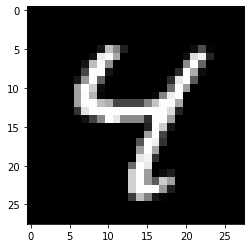

In [ ]:
print("PREDICTION MADE BY THE MODEL: ")
print(np.argmax(model.predict([X_test[6].reshape(-1, 28, 28, 1)])))
print("\n\n")
print("ACTUAL IMAGE: ")
plt.imshow(X_test[6].reshape(28,28) ,cmap = plt.get_cmap("gray"))
plt.show()
